# Analyzing COVID-19 Data
## COVID-19 originated  in 2019 and has been declared a pandemic. Since then, all nations around the world have been infected with the virus. This data set shows the number of cases and deaths in every country. 

## Data Source

The data is from [European Centre for Diease Prevention and Control](https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide)

In [5]:
%matplotlib inline 
import pandas

## The data 
### Here is a general overview of the COVID-19 data in my S3 bucket

In [14]:
df = pandas.read_excel('s3://lambo-ia241-bucket/covid_data.xls')
df[:20] #top 20 rows

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,2020-12-12 00:00:00,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,2020-11-12 00:00:00,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,2020-10-12 00:00:00,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658
5,2020-09-12 00:00:00,9,12,2020,135,13,Afghanistan,AF,AFG,38041757.0,Asia,6.963401
6,2020-08-12 00:00:00,8,12,2020,200,6,Afghanistan,AF,AFG,38041757.0,Asia,7.094835
7,2020-07-12 00:00:00,7,12,2020,210,26,Afghanistan,AF,AFG,38041757.0,Asia,7.215755
8,2020-06-12 00:00:00,6,12,2020,234,10,Afghanistan,AF,AFG,38041757.0,Asia,7.326160
9,2020-05-12 00:00:00,5,12,2020,235,18,Afghanistan,AF,AFG,38041757.0,Asia,7.115865


## The top 3 questions I will be answering today are:
### 1. What are the top 10 countries with the highest number of cases?
### 2. What is the sum of deaths per month?
### 3. How does the number of cases in Greece relate to the number of deaths in the country?

# Question 1: What are the top 10 countries with the highest number of cases?

## Trend number of cases
### first, we need to find the trend of number of cases from the start of the pandemic

In [26]:
sum_cases_per_day = df.groupby('dateRep').sum()['cases']

<AxesSubplot:xlabel='dateRep'>

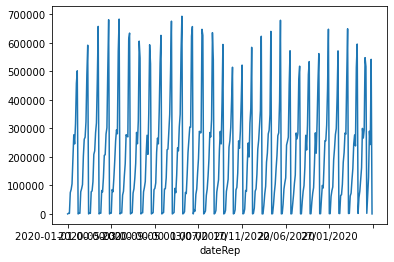

In [27]:
sum_cases_per_day.plot()

## Top 10 countries with highest cases
### now, we find the top 10 countries with highest number of cases given the data

In [16]:
sum_deaths_per_country = df.groupby('countriesAndTerritories').sum()['cases']


<AxesSubplot:xlabel='countriesAndTerritories'>

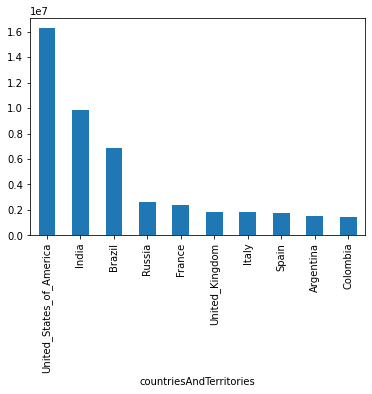

In [17]:
sum_deaths_per_country.nlargest(10).plot.bar()


### this data shows the top 10 countries with the highest number of cases during the pandemic

# Question 2: What is the sum of deaths per month?


<AxesSubplot:xlabel='month'>

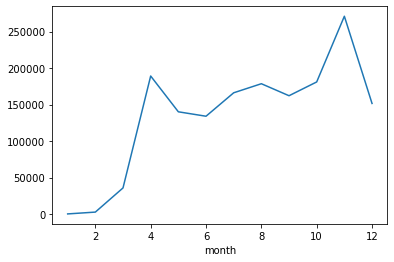

In [30]:
sum_death_by_month = df.groupby('month').sum()['deaths']
sum_death_by_month.plot()

### this data shows that there were two big waves of deaths during the pandemic. The first spike in deaths happened in month 4, and the second spike in deaths happened in month 11. The greatest spike in deaths was more than 250,000 deaths.

# Question 3: How does the number of cases in Greece relate to the number of deaths in the country?

## First, we need to select Greeces data out of the data pool:

In [31]:
greece_data = df.loc[df['countriesAndTerritories'] == 'Greece']
greece_data[:10] #top 10 rows

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
22776,14/12/2020,14,12,2020,692,85,Greece,EL,GRC,10724599.0,Europe,189.349737
22777,13/12/2020,13,12,2020,1194,68,Greece,EL,GRC,10724599.0,Europe,194.021240
22778,2020-12-12 00:00:00,12,12,2020,1395,102,Greece,EL,GRC,10724599.0,Europe,199.177610
22779,2020-11-12 00:00:00,11,12,2020,1533,81,Greece,EL,GRC,10724599.0,Europe,204.641684
22780,2020-10-12 00:00:00,10,12,2020,1675,95,Greece,EL,GRC,10724599.0,Europe,209.163998
22781,2020-09-12 00:00:00,9,12,2020,1324,102,Greece,EL,GRC,10724599.0,Europe,213.602392
22782,2020-08-12 00:00:00,8,12,2020,1250,89,Greece,EL,GRC,10724599.0,Europe,221.127149
22783,2020-07-12 00:00:00,7,12,2020,903,101,Greece,EL,GRC,10724599.0,Europe,222.404586
22784,2020-06-12 00:00:00,6,12,2020,1383,98,Greece,EL,GRC,10724599.0,Europe,227.952579
22785,2020-05-12 00:00:00,5,12,2020,1648,98,Greece,EL,GRC,10724599.0,Europe,236.586934


## Now that we have collected just Greeces COVID-19 data, we will now find how the number of cases relates to the number of deaths in the country:

<AxesSubplot:xlabel='cases', ylabel='deaths'>

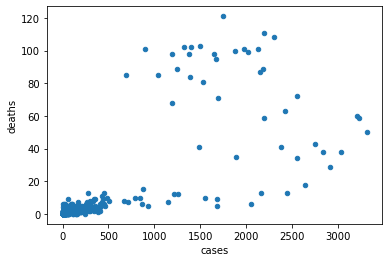

In [54]:
greece_data.plot.scatter(x = 'cases', y = 'deaths')

### This scatter plot shows that when there is an increase of cases, there is an increase in deaths. When the number of cases is lower, there are less deaths in Greece.

# Conclusion:
## To conclude, COVID-19 has impacted many countries around the world. The United States had the most cases in the world, the deaths reached over 250,000, and when there were more cases there was a jump in deaths in Greece. Python allows us to easily sort and visualize the data through data plots and charts. Next time, I would like to compare two countries COVID-19 data next to one another to compare and contrast how the pandemic impacted them. 

#### Author: Athena Lambropoulos 
#### IA 241 
#### May 2022